In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import dlib
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [3]:
tf.__version__

'2.5.0'

In [ ]:
test_videos = '/content/gdrive/MyDrive/191010228_191010230_191010239/dataset/test_videos'
os.listdir(test_videos)

['acqfdwsrhi.mp4',
 'dgmevclvzy.mp4',
 'dqqtjcryjv.mp4',
 'drcyabprvt.mp4',
 'etdcqxabww.mp4',
 'ekcrtigpab.mp4']

In [22]:
video_name = input("Enter a video name: ")
video = video_name.split('.')[0]
extension = video_name.split('.')[1]
video_name = video + '.' + extension

Enter a video name: ekcrtigpab.mp4


In [23]:
def select_model(model_name):
    if model_name == 'InceptionResnetv2':
        detection_model = load_model('/content/gdrive/MyDrive/191010228_191010230_191010239/deepfake-detection-model-inceptionresnetv2.h5')
    elif model_name == 'VGG16':
        detection_model = load_model('/content/gdrive/MyDrive/191010228_191010230_191010239/deepfake-detection-model-vgg.h5')
    else:
        return "An Error Occurred!!!"
    return detection_model

model = input("Select a model: \n\n1)InceptionResnetv2   2)VGG16 \n\n")
if model == '1':
    model = 'InceptionResnetv2'
elif model == '2':
    model = 'VGG16'
else:
    print("Enter correct option")

print("\n\nmodel: {} selected".format(model))

Select a model: 

1)InceptionResnetv2   2)VGG16 

2


model: VGG16 selected


writing frame : 1
writing frame : 2
writing frame : 3
writing frame : 4
writing frame : 5
writing frame : 6
writing frame : 7
writing frame : 8
writing frame : 14
writing frame : 15
writing frame : 16
writing frame : 17
writing frame : 18
writing frame : 19
writing frame : 20
writing frame : 21
writing frame : 22
writing frame : 23
writing frame : 24
writing frame : 25
writing frame : 26
writing frame : 27
writing frame : 28
writing frame : 29
writing frame : 30
writing frame : 31
writing frame : 32
writing frame : 33
writing frame : 34
writing frame : 35
writing frame : 36
writing frame : 37
writing frame : 38
writing frame : 39
writing frame : 40
writing frame : 41
writing frame : 42
writing frame : 43
writing frame : 44
writing frame : 45
writing frame : 46
writing frame : 47
writing frame : 48
writing frame : 49
writing frame : 50
writing frame : 51
writing frame : 52
writing frame : 53
writing frame : 54
writing frame : 55
writing frame : 56
writing frame : 57
writing frame : 58
w

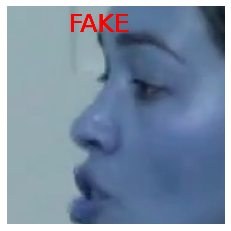

In [24]:
def prediction(model,video_path,folder_name):
    result_path = '/content/gdrive/MyDrive/191010228_191010230_191010239/result/' + folder_name
    if os.path.exists(result_path):
        shutil.rmtree(result_path)
        os.makedirs(result_path)
    else:
        os.makedirs(result_path)
    input_shape = (128, 128, 3)
    pr_data = []
    detector = dlib.get_frontal_face_detector()
    cap = cv2.VideoCapture(video_path)
    frameRate = cap.get(5)
    count = 0
    while cap.isOpened():

        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        count += 1
        if frameId % ((int(frameRate)+1)*1) == 0: 
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
                data = data.reshape(-1, 128, 128, 3)
                if np.argmax(model.predict(data)) == 1:
                    plt.imshow(crop_img)
                    plt.axis('off')
                    plt.text(50,20,'FAKE',fontsize = 25,c = 'r')
                    plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                    print("writing frame : %d" % count)
                elif np.argmax(model.predict(data)) == 0:
                    plt.imshow(crop_img)
                    plt.axis('off')
                    plt.text(50,20,'REAL',fontsize = 25,c = 'r')
                    plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                    print("writing frame : %d" % count)
        else:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
                data = data.reshape(-1, 128, 128, 3)
                plt.imshow(crop_img)
                plt.axis('off')
                plt.savefig(result_path + '/' + 'frame%d.jpg' % count)
                print("writing frame : %d" % count)

mod = select_model(model)
prediction(mod,'/content/gdrive/MyDrive/191010228_191010230_191010239/dataset/test_videos/'+ video_name,video)